## Assignment 1 - Donna Santos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

import matplotlib.pyplot as plt

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
from sklearn.datasets import load_boston
boston_data= load_boston()

In [ ]:
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


1. data: contains the information for various house
2. target: prices of the house
3. feature_names: names of the features
4. DESCR: describes the dataset

In [ ]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Use MEDV as TARGET 

In [ ]:
boston_df['MEDV'] = boston_data.target

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
#CHECK THE DATA
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Check Missing Values

In [ ]:
#CHECK MISSING VALUES
boston_df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Check Histogram of MEDV

C:\Users\donna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

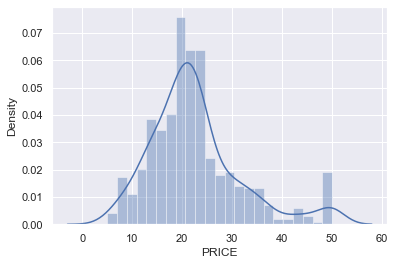

In [ ]:
sns.distplot(boston_df['PRICE'])

### Check Correlation

<AxesSubplot:>

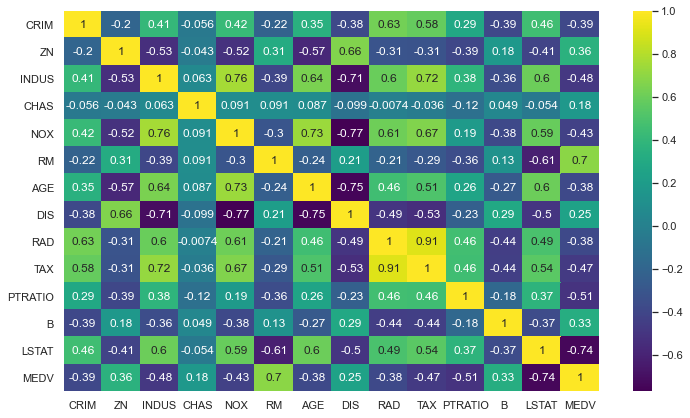

In [ ]:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(boston_df.corr(),cmap='viridis',annot=True)

### CHOOSE PREDICTORS

In [ ]:
X = boston_df[['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston_df[['MEDV']]

### SPLIT DATASET INTO TRAINING AND TEST DATASET

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=99)

In [ ]:
X_train.head()

,CRIM,INDUS,NOX,AGE,RAD,TAX,PTRATIO,B,LSTAT
280,0.03578,3.33,0.4429,64.5,5.0,216.0,14.9,387.31,3.76
505,0.04741,11.93,0.5730,80.8,1.0,273.0,21.0,396.90,7.88
12,0.09378,7.87,0.5240,39.0,5.0,311.0,15.2,390.50,15.71
435,11.16040,18.10,0.7400,94.6,24.0,666.0,20.2,109.85,23.27
309,0.34940,9.90,0.5440,76.7,4.0,304.0,18.4,396.24,9.97


In [ ]:
X_train.shape

(328, 9)

In [ ]:
y_test.head()

,MEDV
281,35.4
273,35.2
251,24.8
329,22.6
40,34.9


In [ ]:
y_test.shape

(178, 1)

### SCALE AND STANDARDIZE DATASET

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train)
y_train1 = scaler.fit_transform(y_train)
X_test1 = scaler.fit_transform(X_test)
y_test1 = scaler.fit_transform(y_test)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train1,y_train1)

LinearRegression()

### Intercept

In [ ]:
print(model1.intercept_)

[2.36234754e-16]


### Coefficient

In [ ]:
print(model1.coef_)

[[-0.06596649  0.07313202 -0.11863162  0.18169055  0.39581982 -0.27322306
  -0.36146583  0.08293647 -0.66430264]]


In [ ]:
X.columns

Index(['CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='object')

In [ ]:
coeff_df = pd.DataFrame(model1.coef_.transpose(),X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.065966
INDUS,0.073132
NOX,-0.118632
AGE,0.181691
RAD,0.395820
TAX,-0.273223
PTRATIO,-0.361466
B,0.082936
LSTAT,-0.664303


### Predict the MEDV Values

In [ ]:
y_hat = model1.predict(X_test1)

### Measure the model performance

In [ ]:
print('MAE', round(metrics.mean_absolute_error(y_test1, y_hat),4))
print('MSE', round(metrics.mean_squared_error(y_test1, y_hat),4))
print('RMSE', round(np.sqrt(metrics.mean_squared_error(y_test1,y_hat)),4))

MAE 0.4467
MSE 0.4186
RMSE 0.647


### Descale to Check the Actual and Predicted Values thru Graphs

In [ ]:
y_test_inv = scaler.inverse_transform(y_test1)
y_hat_inv = scaler.inverse_transform(y_hat)

C:\Users\donna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


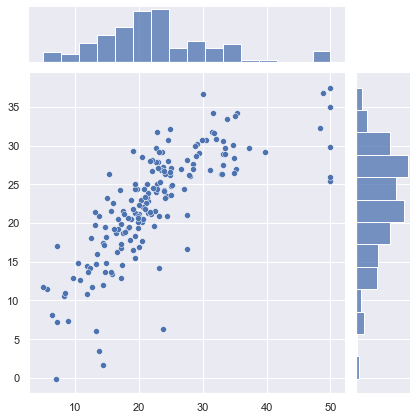

In [ ]:
sns.jointplot(y_test_inv.ravel(),y_hat_inv.ravel(),kind='scatter')

C:\Users\donna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

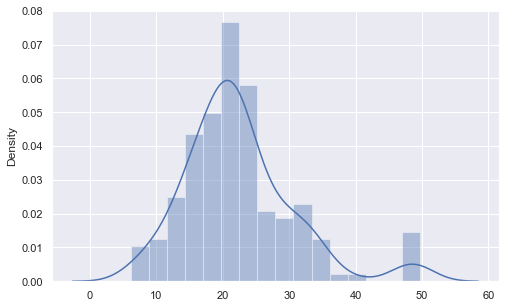

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot((y_test-y_hat))

## Linear Regression with Stochastic Gradient Descent (SGD Regressor in sklearn), with penalty of 'Ridge Regression'

## --Using Import SGDRegressor--

### Perform Linear Regression with SGD Regressor - Ridge Penalty

In [ ]:
from sklearn.linear_model import SGDRegressor

model1_SGD = SGDRegressor(penalty="l2", alpha=0.1, tol=None,max_iter=1000, eta0=0.01, random_state=42)

### Fit the model

In [ ]:
model1_SGD.fit(X_train1, y_train1.ravel())

SGDRegressor(alpha=0.1, random_state=42, tol=None)

### Get Intercept

In [ ]:
model1_SGD.intercept_

array([0.00013158])

### Get Coefficient

In [ ]:
coeff_df1 = pd.DataFrame(model1_SGD.coef_.transpose(),X.columns,columns=['Coefficient'])
coeff_df1

,Coefficient
CRIM,-0.054471
INDUS,-0.009898
NOX,-0.057516
AGE,0.113093
RAD,0.198731
TAX,-0.111847
PTRATIO,-0.317223
B,0.079056
LSTAT,-0.569675


### Predict MEDV 

In [ ]:
y_test_predict = model1_SGD.predict(X_test1)

### Check Model Performance thru MAE, MSE and RMSE

In [ ]:
print('MAE', round(metrics.mean_absolute_error(y_test1, y_test_predict),4))
print('MSE', round(metrics.mean_squared_error(y_test1, y_test_predict),4))
print('RMSE', round(np.sqrt(metrics.mean_squared_error(y_test1,y_test_predict)),4))

MAE 0.443
MSE 0.4217
RMSE 0.6494


### Descale to Check the Actual and Predicted Values thru Graphs

In [ ]:
y_test_inv = scaler.inverse_transform(y_test1)

In [ ]:
y_test_pred_inv = scaler.inverse_transform(y_test_predict.reshape(178,1))

### Plot predicted values against the actual values

C:\Users\donna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

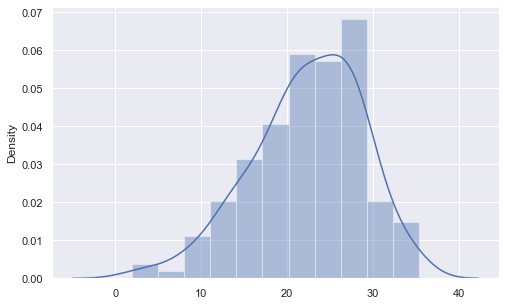

In [ ]:
sns.distplot(y_test_pred_inv)

C:\Users\donna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


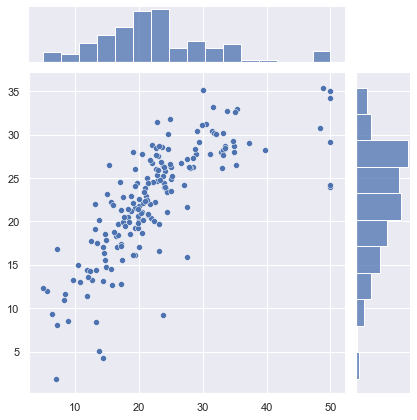

In [ ]:
sns.jointplot(y_test_inv.ravel(), y_test_pred_inv.ravel(), kind = "scatter")

# Linear Regression with Stochastic Gradient Descent (SGD Regressor in sklearn), with penalty of 'Elastic Regression'

### CREATE A MODEL USING SGD WITH PENALTY OF ELASTIC REGRESSION

In [ ]:
from sklearn.linear_model import SGDRegressor

model2_SGD = SGDRegressor(penalty="l1", alpha=0.1, tol=None,max_iter=1000, eta0=0.01, random_state=42)

### Fit the Model

In [ ]:
model2_SGD.fit(X_train1, y_train1.ravel())

SGDRegressor(alpha=0.1, penalty='l1', random_state=42, tol=None)

### Intercept

In [ ]:
model2_SGD.intercept_

array([-3.91828041e-08])

### Coefficient

In [ ]:
coeff_df2 = pd.DataFrame(model2_SGD.coef_.transpose(),X.columns,columns=['Coefficient'])
coeff_df2

,Coefficient
CRIM,0.000000
INDUS,0.000000
NOX,0.000000
AGE,0.000000
RAD,0.000000
TAX,0.000000
PTRATIO,-0.231607
B,0.000000
LSTAT,-0.555723


### Predict the MEDV

In [ ]:
y_test_predict2 = model2_SGD.predict(X_test1)

### Measure the Model Performance

In [ ]:
print('MAE', round(metrics.mean_absolute_error(y_test1, y_test_predict2),4))
print('MSE', round(metrics.mean_squared_error(y_test1, y_test_predict2),4))
print('RMSE', round(np.sqrt(metrics.mean_squared_error(y_test1,y_test_predict2)),4))

MAE 0.4586
MSE 0.4479
RMSE 0.6693


In [ ]:
y_test_pred_inv2 = scaler.inverse_transform(y_test_predict2.reshape(178,1))

### Visualize the predicted and actual MEDV

C:\Users\donna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


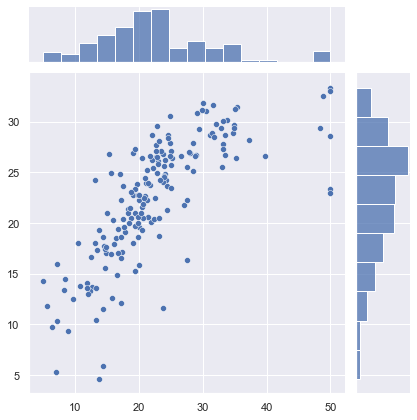

In [ ]:
sns.jointplot(y_test_inv.ravel(), y_test_pred_inv2.ravel(), kind = "scatter")

C:\Users\donna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

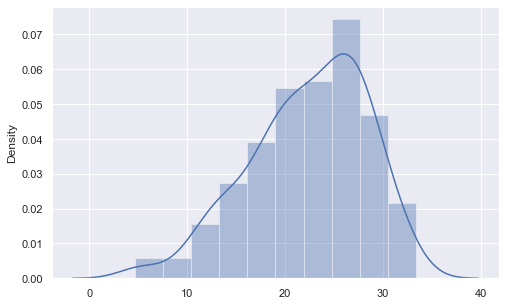

In [ ]:
sns.distplot(y_test_pred_inv2)

# COMPARISON OF 3 MODELS

#### Based on the model performance of the three regression such as
#### 1. Linear Regression
#### 2. Linear Regression with SGD - with penalty of Ridge
#### 3. Linear Regression with SGD - with penalty of Elastic

#### The highest measure is the Linear Regression with SGD - with penalty of Elastic. However, the improvement is not signficant as the model was just improved by less than 0.1.